For most business users, they've been exposed to Monte Carlo methods in school through proprietary and expensive Excel Add-ins, and then they are set free into a work environment where those expensive add-ins are no longer available. This is usually the end of Monte Carlo for them, but it's quite trivial to do in Python.

Repeated random sampling from a probability distribution in Python

References:
1. [Wikipedia, Monte Carlo Method](https://en.wikipedia.org/wiki/Monte_Carlo_method)
2. [numpy.random.triangular](https://numpy.org/doc/stable/reference/random/generated/numpy.random.triangular.html)
    * `triangular(left, mode, right, size=None)`
3. [Wikipedia, Triangular distribution](https://en.wikipedia.org/wiki/Triangular_distribution)
4. [numpy.random.choice](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html)
    * `choice(a, size=None, replace=True, p=None)`

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# set a seed for reproducibility
np.random.seed(42)

We'll rely on numpy's methods to generate arrays of random samples. Two methods I'll focus on are using draws from a triangular distribution with `np.random.triangular` and a discrete distribution using `np.random.choice`. 

## Drawing from a triangular distribution

In a business setting, when dealing with uncertainty, domain experts will phrase their assessment of probabilities using terms like 'low-base-high case' or 'bull-base-bear case' (if you're in finance). In other words, they think about the extreme upper and lower possibilities and a 'most likely' case. This can be translated into a triangular distribution and can be generated quickly in `numpy`:

In [2]:
np.random.triangular(left=1, mode=3, right=5, size=10)

array([2.73098843, 4.37207839, 3.53574303, 3.20814841, 2.11720594,
       2.11711958, 1.68166627, 3.96530641, 3.2136406 , 3.4717921 ])

435 ms ± 3.02 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


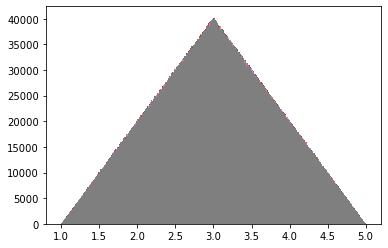

In [3]:
%%timeit
samples = np.random.triangular(left=1, mode=3, right=5, size=10**7)
plt.hist(samples, bins=500)

10M samples takes about ~500 ms or about half a second.

## Drawing from a discrete distribution

In [4]:
choices = [1, 3, 5]
probabilities = [.1, .8, .1] # must sum to 1
np.random.choice(a=choices, size=10, replace=True, p=probabilities)

array([3, 3, 3, 3, 1, 3, 5, 3, 3, 3])

46.2 ms ± 3.16 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


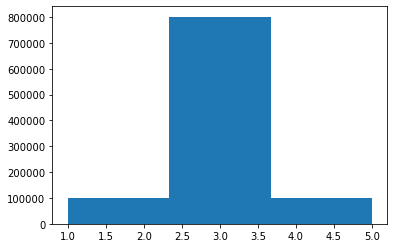

In [6]:
%%timeit
discrete_samples = np.random.choice(a=choices, size=10**6, replace=True, p=probabilities)
plt.hist(discrete_samples, bins=3)

`np.random.choice` takes significantly longer at 13 seconds at 10M samples, so we run it with 1M samples for now just to demo it.

## By Example

Here's a simple example from corporate finance on when you'll use a Monte Carlo method. 

You are asked to estimate the potential costs that your company will incur if they decide to invest in a new project. We have our engineers estimate how long it'll take and how many resources they think they might need, and your job is to estimate the cost of the project. 

There are three variables in determining the cost of the project:
* How many people it will take
* How long it will take

In [31]:
people = np.random.choice(a=[1,2,3], size=10**7, replace=True, p=[.2,.6,.2])
time = np.random.choice(a=[1,3,5], size=10**7, replace=True, p=[.2, .7, .1])
labor_rate = 50

In [32]:
cost = people * time * labor_rate

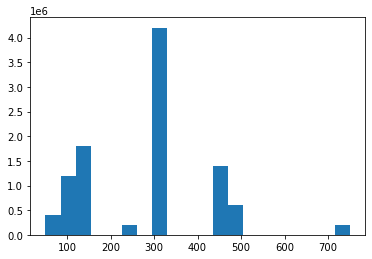

In [33]:
fig = plt.hist(cost, bins=20)

In [34]:
np.mean(cost)

279.898715

Now you could have calculated the average quite easily using your inputs (and this is typically where most analysts will stop), but the nice thing about Monte Carlo is that you can get additional numerical information from this simulation - like the median, standard deviation, mode, etc:

In [35]:
np.median(cost)

300.0

In [36]:
np.std(cost)

143.475855429925

And you can get confidence intervals:

In [37]:
# 80% confint
(np.percentile(cost, 10), np.percentile(cost, 90))

(100.0, 450.0)

Now let's say that we want to add another variable - revenue. We ask our revenue analysts and they think the project could bring in either \\$10 or \\$15 per unit (it's a 50-50 chance of either) and volumes will be around 1800 units, with a best case of 2400 and worst case 1000. 

We'll model the price assumption as a discrete distribution and volumes as a triangular distribution:

In [86]:
price = [10, 15]
price_probabilities = [0.5, 0.5]

In [87]:
prices = np.random.choice(price, size=10**7, replace=True, p=price_probabilities)
volumes = np.random.triangular(left=1000, mode=1800, right=2400, size=10**7)
# Calculate the revenues
revenue = prices * volumes

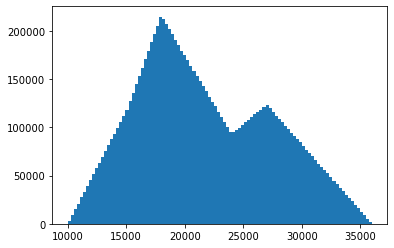

In [88]:
fig = plt.hist(revenue, bins=100)

We can run our statistics again:

In [89]:
np.mean(revenue)

21666.70489902372

In [90]:
np.median(revenue)

20705.70824132701

In [91]:
np.std(revenue)

5669.020124454094

In [92]:
(np.percentile(revenue, 10), np.percentile(revenue, 90))

(14733.504705181971, 29852.175758982165)

Finally, we can take our results and check the expected profit margin from this effort: (imagine this is a digital product that doesn't have any costs)

In [93]:
margin = revenue - cost

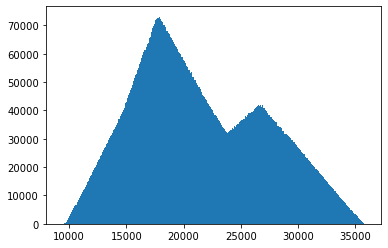

In [94]:
fig = plt.hist(margin, bins=300)

In [95]:
np.mean(margin)

21386.806184023717

In [96]:
np.median(margin)

20427.216630348783

In [97]:
np.std(margin)

5670.856944173494

In [98]:
# 80% confint
(np.percentile(margin, 10), np.percentile(margin, 90))

(14451.087496083595, 29574.72188314046)

So we see that it's pretty easy to do quick monte carlo simulations without the need for an expensive Excel add-in package, and it's trivial to add and change requirements to suit your needs.